# FINAL MODULE PROJECT - GROUP 5

## Predict genetic disorders from dataset

In [38]:
import pandas as pd
import numpy as np

import os
print(os.listdir("./"))

['DATASETS.md', 'README.md', '.git', '.ipynb_checkpoints', 'explicacion_cols.pdf', 'data', 'PROJECT.md', '.gitignore', 'Notebook _G5_Project.ipynb', 'pathology_prediction.py', 'resources', 'train_genetic_disorders.csv']


In [3]:
data = pd.read_csv('./train_genetic_disorders.csv')
data.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [6]:
print("Dataset size: ", data.shape)
print('\n', '**'* 50, '\n')
data.info()
print('\n', '**'* 50, '\n')
data.describe(include = 'all')

Dataset size:  (22083, 45)

 **************************************************************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        21011 non-null  object 
 1   Patient Age                                       19643 non-null  float64
 2   Genes in mother's side                            21011 non-null  object 
 3   Inherited from father                             20724 non-null  object 
 4   Maternal gene                                     18317 non-null  object 
 5   Paternal gene                                     21011 non-null  object 
 6   Blood cell count (mcL)                            21011 non-null  float64
 7   Patient First Name                         

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
count,21011,19643.000000,21011,20724,18317,21011,21011.000000,21011,11771,21011,...,18959,18965.000000,18977,18955.000000,18899.000000,19008.000000,18987.000000,18956.000000,18962,18943
unique,21011,NaN,2,2,2,2,NaN,2480,6051,15777,...,2,NaN,4,NaN,NaN,NaN,NaN,NaN,3,9
top,PID0x266b,NaN,Yes,No,Yes,No,NaN,James,Smith,Clardie,...,Singular,NaN,slightly abnormal,NaN,NaN,NaN,NaN,NaN,Mitochondrial genetic inheritance disorders,Leigh syndrome
freq,1,NaN,12509,12508,10125,11887,NaN,394,151,6,...,9509,NaN,4855,NaN,NaN,NaN,NaN,NaN,9686,4893
mean,NaN,6.974851,NaN,NaN,NaN,NaN,4.899004,NaN,NaN,NaN,...,NaN,7.484680,NaN,0.592034,0.552886,0.537405,0.497393,0.460804,NaN,NaN
std,NaN,4.322584,NaN,NaN,NaN,NaN,0.199829,NaN,NaN,NaN,...,NaN,2.653633,NaN,0.491470,0.497208,0.498612,0.500006,0.498474,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,4.092727,NaN,NaN,NaN,...,NaN,3.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,3.000000,NaN,NaN,NaN,NaN,4.763230,NaN,NaN,NaN,...,NaN,5.419026,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,7.000000,NaN,NaN,NaN,NaN,4.899548,NaN,NaN,NaN,...,NaN,7.473071,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN
75%,NaN,11.000000,NaN,NaN,NaN,NaN,5.033977,NaN,NaN,NaN,...,NaN,9.528684,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN


In [7]:
data.isnull().sum()

Patient Id                                           1072
Patient Age                                          2440
Genes in mother's side                               1072
Inherited from father                                1359
Maternal gene                                        3766
Paternal gene                                        1072
Blood cell count (mcL)                               1072
Patient First Name                                   1072
Family Name                                         10312
Father's name                                        1072
Mother's age                                         6790
Father's age                                         6761
Institute Name                                       5932
Location of Institute                                1072
Status                                               1072
Respiratory Rate (breaths/min)                       3131
Heart Rate (rates/min                                3097
Test 1        

In [ ]:
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)
print("Dataset size: ", data.shape)
data.isnull().sum()

In [16]:
print('Número de muestras por clase:')
print(data["Genetic Disorder"].value_counts())

Número de muestras por clase:
Mitochondrial genetic inheritance disorders     3238
Single-gene inheritance diseases                2447
Multifactorial genetic inheritance disorders     685
Name: Genetic Disorder, dtype: int64


<AxesSubplot:xlabel='Genetic Disorder', ylabel='count'>

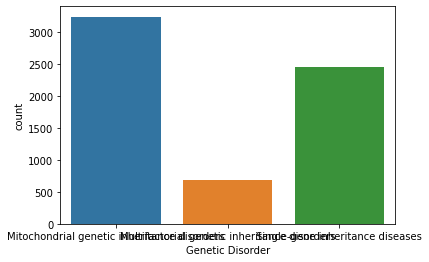

In [17]:
import seaborn as sns # buscar manera 
sns.countplot(data=data, x='Genetic Disorder')

KeyboardInterrupt: 

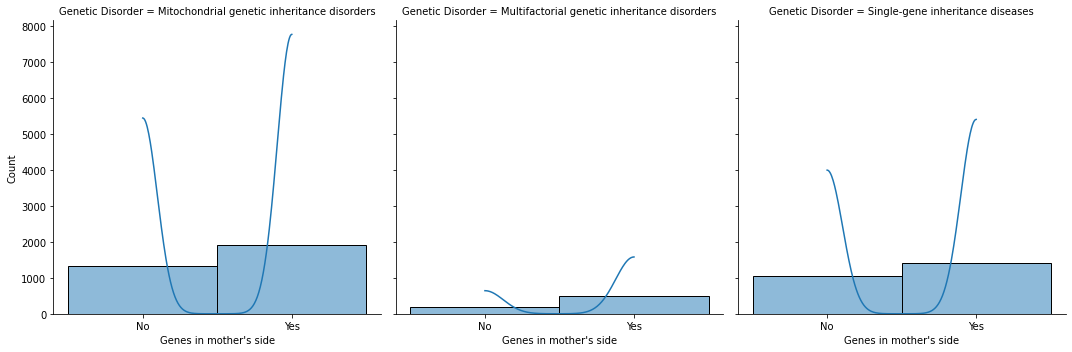

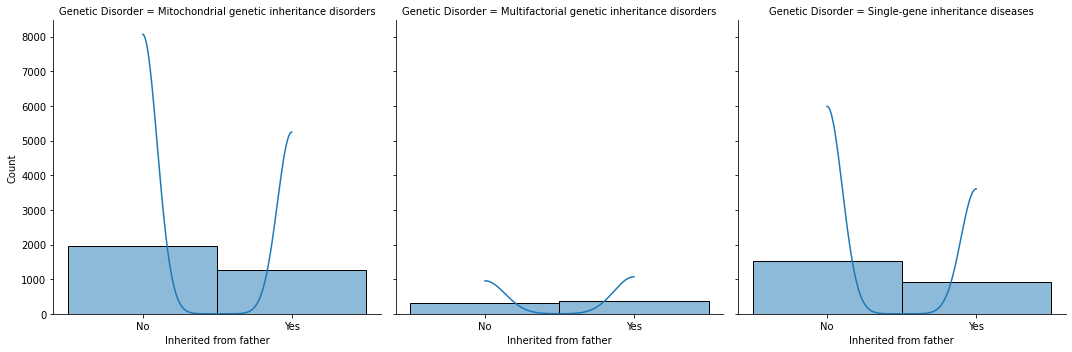

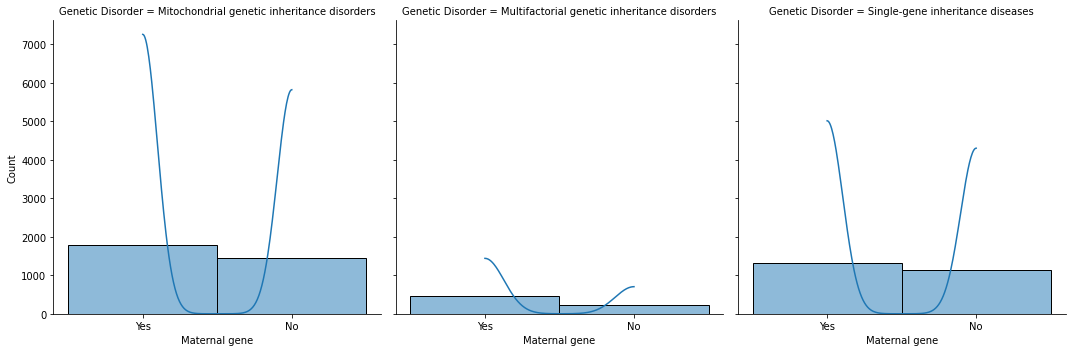

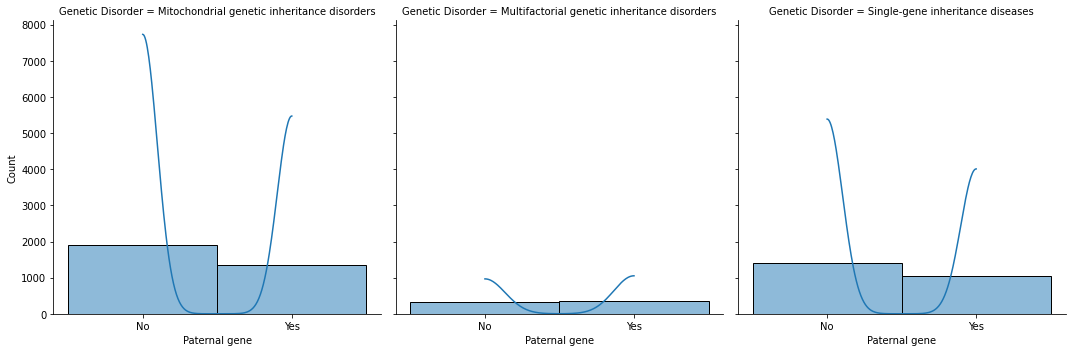

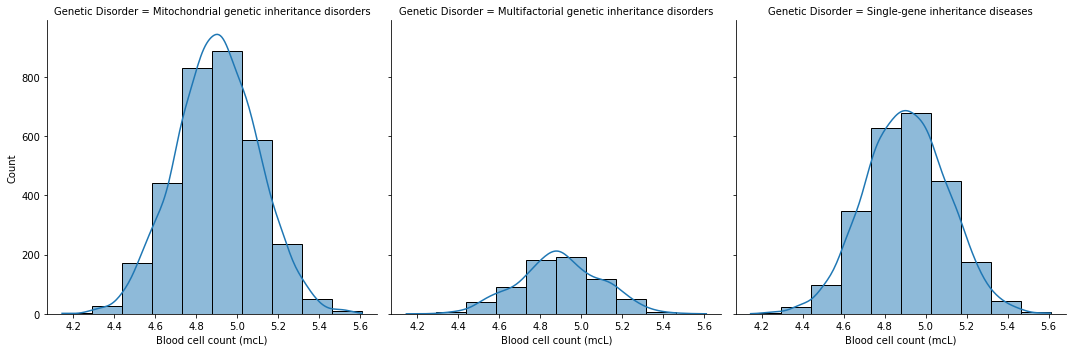

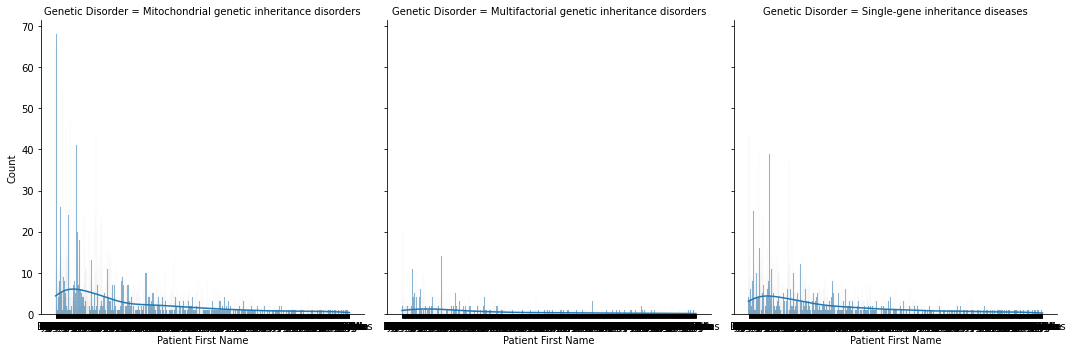

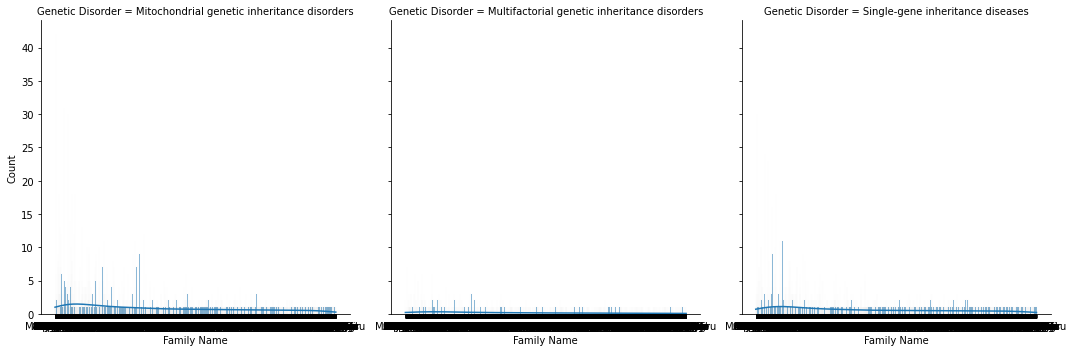

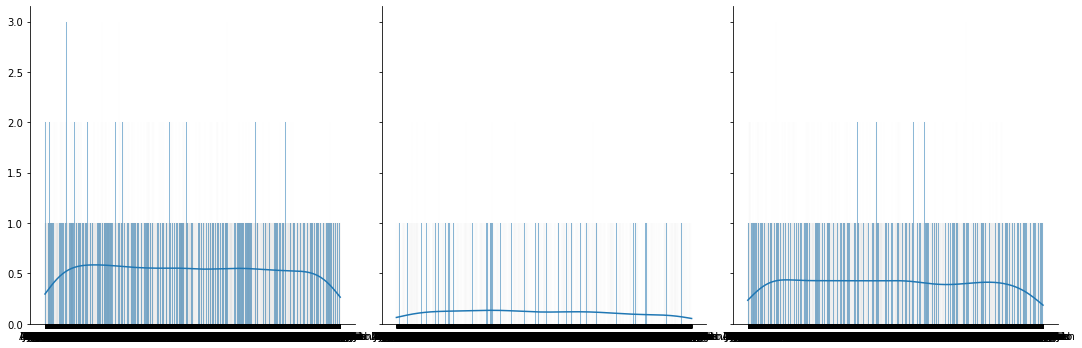

In [19]:
for x in data.columns[2:len(data.columns)]:# que es esto, diferentes formas de valoración
    sns.displot(data=data, x=x, col='Genetic Disorder', kde=True, bins=10) #kde linea de valoracion

In [36]:
# Now to strip columns
data.columns = data.columns.str.replace('\'','')



Index(['Patient Id', 'Patient Age', 'Genes in mothers side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Fathers name', 'Mothers age', 'Fathers age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Sympt

In [37]:
print(data.columns)

Index(['Patient Id', 'Patient Age', 'Genes in mothers side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Fathers name', 'Mothers age', 'Fathers age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Sympt